In [1]:
import os
from os.path import join as p_join
import sys
sys.path.insert(0, '..')
import time
import pickle
import json
from tqdm.notebook import tqdm
import itertools
import collections
from datetime import datetime
from dateutil.relativedelta import relativedelta

import numpy as np
import pandas as pd
import scipy
from matplotlib_venn import *
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode,  iplot
init_notebook_mode(connected=True)

%matplotlib inline

In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
import requests
pd.set_option('max.columns', 100)

In [7]:
PROJECT_PATH = '..'

In [8]:
from src.parse_utils import (
    parse_supplies,
    parse_purchases,
    parse_sales,
    parse_storage,
    parse_report
)

from src.utils import create_wb_db_connection
eng = create_wb_db_connection()

from src.train.train_arima import make_df_for_arima, train_arimas
from src.predict.arimas_forecast import find_latest_model, make_forecast

In [10]:
matplotlib.rcParams['figure.figsize'] = (8, 8)
sns.set_style('whitegrid')

---

In [11]:
df_for_forecast = make_df_for_arima()
df_for_forecast.head()

,subject,day,sum_sales
0,Бандажи коленные,2021-09-01,0.0
1,Бандажи коленные,2021-09-02,0.0
2,Бандажи коленные,2021-09-03,0.0
3,Бандажи коленные,2021-09-04,0.0
4,Бандажи коленные,2021-09-05,1.0


In [12]:
df_for_forecast.groupby(['subject'])['day'].count()

subject
Бандажи коленные                   148
Колтунорезки                       148
Корзинки                           148
Ложки чайные                       148
Маски для сна                      148
Миски для животных                 148
Наборы кухонных принадлежностей    148
Наборы столовых приборов           148
Органайзеры для хранения           148
Сумки                              148
Name: day, dtype: int64

In [9]:
# Обучение и сохранение арима моделей
models_dict, max_train_date = train_arimas()

Обучаем Аримы...


  0%|                                                                                                         | 0/10 [00:00<?, ?it/s]

====Обучаем ARIMA для subject=Бандажи коленные...==================================================

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=733.821, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=702.328, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.21 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=724.630, Time=0.01 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=647.939, Time=0.11 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=649.066, Time=0.27 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=643.514, Time=0.29 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.27 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=1.90 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=inf, Time=1.13 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=inf, Time=0.92 sec
 ARIMA(1,1,0)(3,1,2)[12]             : AIC=inf, Time=2.12 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=658.349, Time=0.26 sec
 ARIMA(2,1,0)(2,1,1)[1

 10%|█████████▋                                                                                       | 1/10 [01:06<09:57, 66.44s/it]

 ARIMA(0,1,2)(2,1,1)[12] intercept   : AIC=inf, Time=1.45 sec

Best model:  ARIMA(0,1,2)(2,1,1)[12]          
Total fit time: 66.274 seconds
ок
Модель для Бандажи коленные обучилась за 1.0 минут 6.438445059000003 секунд

====Обучаем ARIMA для subject=Колтунорезки...==================================================

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=847.698, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=752.637, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.24 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=791.293, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=736.364, Time=0.15 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=732.835, Time=0.32 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=730.413, Time=0.62 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=729.014, Time=1.12 sec
 ARIMA(1,1,0)(5,1,1)[12]             : AIC=inf, Time=6.55 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=inf, Time=

 20%|███████████████████▍                                                                             | 2/10 [02:52<11:58, 89.81s/it]

 ARIMA(3,1,1)(5,1,0)[12] intercept   : AIC=inf, Time=7.74 sec

Best model:  ARIMA(3,1,1)(5,1,0)[12]          
Total fit time: 105.991 seconds
ок
Модель для Колтунорезки обучилась за 1.0 минут 46.171442422 секунд

====Обучаем ARIMA для subject=Корзинки...==================================================

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=514.492, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=471.368, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=403.210, Time=0.11 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=447.181, Time=0.03 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.31 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=0.77 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=430.199, Time=0.06 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=1.40 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=468.069, Time=0.07 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=405.040, Time=0.15 sec
 AR

 30%|█████████████████████████████                                                                    | 3/10 [02:56<05:53, 50.55s/it]

 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=404.878, Time=0.26 sec

Best model:  ARIMA(0,1,1)(0,1,1)[12]          
Total fit time: 3.820 seconds
ок
Модель для Корзинки обучилась за 0.0 минут 3.8309091860000137 секунд

====Обучаем ARIMA для subject=Ложки чайные...==================================================

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=568.973, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=466.464, Time=0.04 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.30 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=514.386, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=461.993, Time=0.10 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=460.107, Time=0.22 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=459.711, Time=0.50 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=459.572, Time=0.85 sec
 ARIMA(1,1,0)(5,1,1)[12]             : AIC=inf, Time=6.39 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=inf, Time=3.49

 40%|██████████████████████████████████████▊                                                          | 4/10 [04:34<06:56, 69.38s/it]

 ARIMA(5,1,0)(5,1,0)[12] intercept   : AIC=429.617, Time=2.73 sec

Best model:  ARIMA(5,1,0)(5,1,0)[12]          
Total fit time: 98.079 seconds
ок
Модель для Ложки чайные обучилась за 1.0 минут 38.257915935 секунд

====Обучаем ARIMA для subject=Маски для сна...==================================================

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=917.334, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=828.003, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.24 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=860.152, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=810.143, Time=0.14 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=807.108, Time=0.30 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=806.631, Time=0.64 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=803.409, Time=1.61 sec
 ARIMA(1,1,0)(5,1,1)[12]             : AIC=inf, Time=6.38 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=inf, Time=4.22

 50%|████████████████████████████████████████████████▌                                                | 5/10 [06:11<06:35, 79.18s/it]

 ARIMA(4,1,0)(5,1,0)[12] intercept   : AIC=788.157, Time=4.20 sec

Best model:  ARIMA(4,1,0)(5,1,0)[12]          
Total fit time: 96.392 seconds
ок
Модель для Маски для сна обучилась за 1.0 минут 36.536899715000004 секунд

====Обучаем ARIMA для subject=Миски для животных...==================================================

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=502.884, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=448.207, Time=0.04 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.34 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=494.999, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=431.821, Time=0.13 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=425.597, Time=0.34 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=422.764, Time=0.67 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=422.334, Time=1.38 sec
 ARIMA(1,1,0)(5,1,1)[12]             : AIC=inf, Time=7.52 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=in

 60%|██████████████████████████████████████████████████████████▏                                      | 6/10 [07:50<05:44, 86.12s/it]

 ARIMA(3,1,1)(4,1,0)[12] intercept   : AIC=375.026, Time=5.63 sec

Best model:  ARIMA(3,1,1)(4,1,0)[12]          
Total fit time: 99.381 seconds
ок
Модель для Миски для животных обучилась за 1.0 минут 39.590577601999996 секунд

====Обучаем ARIMA для subject=Наборы кухонных принадлежностей...==================================================

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=309.315, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=233.491, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.40 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=277.771, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=201.626, Time=0.15 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=197.831, Time=0.41 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=193.986, Time=0.83 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=195.605, Time=1.53 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=195.171, Time=2.00 sec
 ARIMA(1,1,0)(3,1,1)[12

 70%|███████████████████████████████████████████████████████████████████▉                             | 7/10 [09:38<04:39, 93.10s/it]

 ARIMA(0,1,1)(0,1,2)[12] intercept   : AIC=inf, Time=1.26 sec

Best model:  ARIMA(0,1,1)(0,1,2)[12]          
Total fit time: 107.229 seconds
ок
Модель для Наборы кухонных принадлежностей обучилась за 1.0 минут 47.47221750400007 секунд

====Обучаем ARIMA для subject=Наборы столовых приборов...==================================================

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1114.055, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1057.824, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.25 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1079.574, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1049.761, Time=0.15 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=1042.320, Time=0.37 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=1035.266, Time=0.78 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=1024.452, Time=1.33 sec
 ARIMA(1,1,0)(5,1,1)[12]             : AIC=inf, Time=6.22 sec
 ARIMA(1,1,0)(4,1,

 80%|████████████████████████████████████████████████████████████████████████████▊                   | 8/10 [14:01<04:54, 147.36s/it]

 ARIMA(0,1,1)(5,1,0)[12] intercept   : AIC=inf, Time=8.21 sec

Best model:  ARIMA(0,1,1)(5,1,0)[12]          
Total fit time: 263.085 seconds
ок
Модель для Наборы столовых приборов обучилась за 4.0 минут 23.548163259000034 секунд

====Обучаем ARIMA для subject=Органайзеры для хранения...==================================================

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=648.949, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=616.331, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=584.284, Time=0.12 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=605.676, Time=0.03 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.64 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=0.99 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=600.856, Time=0.07 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=1.27 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=617.777, Time=0.08 sec
 ARIMA(1,1,1)(0,1,1)[12]           

 90%|██████████████████████████████████████████████████████████████████████████████████████▍         | 9/10 [14:14<01:45, 105.20s/it]

 ARIMA(0,1,2)(0,1,1)[12] intercept   : AIC=584.943, Time=0.22 sec

Best model:  ARIMA(0,1,2)(0,1,1)[12]          
Total fit time: 12.468 seconds
ок
Модель для Органайзеры для хранения обучилась за 0.0 минут 12.495211335000022 секунд

====Обучаем ARIMA для subject=Сумки...==================================================

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=633.984, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=583.069, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=535.452, Time=0.13 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=587.611, Time=0.03 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.34 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=0.56 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=558.294, Time=0.06 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=0.60 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=582.217, Time=0.08 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=535.176,

100%|████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [14:20<00:00, 86.03s/it]

 ARIMA(1,1,1)(0,1,1)[12] intercept   : AIC=536.598, Time=0.40 sec

Best model:  ARIMA(1,1,1)(0,1,1)[12]          
Total fit time: 5.966 seconds
ок
Модель для Сумки обучилась за 0.0 минут 5.984978027000011 секунд

Аримы для всех subjects обучились за 14.0 минут 20.3543482849999 секунд
Сохраняем модели...


ок


In [61]:
# Сохранение предсказаний
_ = make_forecast()

In [33]:
df_for_forecast[(df_for_forecast['subject'] == subject)].day.astype('str')

0      2021-09-01
1      2021-09-02
2      2021-09-03
3      2021-09-04
4      2021-09-05
          ...    
143    2022-01-22
144    2022-01-23
145    2022-01-24
146    2022-01-25
147    2022-01-26
Name: day, Length: 148, dtype: object

In [60]:
N = 30
predict_train_data = True

if 'models_dict' not in locals():
    models_dict = pickle.load(
        open(p_join(PROJECT_PATH, 'models', find_latest_model(), 'arima_models.pkl'), mode='rb')
    )

for subject in df_for_forecast['subject'].unique():
    if subject in models_dict:
        preds, confint = models_dict[subject].predict(n_periods=N, return_conf_int=True)
    else:
        print(f'{subject} not in models_dict')
        continue

    fig = go.Figure()
    fig.add_trace(
        go.Scatter(
            x=df_for_forecast[(df_for_forecast['subject'] == subject)].day, 
            y=df_for_forecast[(df_for_forecast['subject'] == subject)].sum_sales, 
            mode='lines+markers',
            name='Исторические продажи'
        )
    )
    if predict_train_data:
        fig.add_trace(
            go.Scatter(
                x=df_for_forecast[(df_for_forecast['subject'] == subject)].day, 
                y=models_dict[subject].predict_in_sample(), 
                mode='lines+markers',
                line={'color': 'limegreen'},
                name='Предсказания на обучении',
            )
        )
    forecast_dates = [(df_for_forecast['day'].max() + pd.DateOffset(days=i)).date() for i in range(1, N+1)]
    fig.add_trace(
        go.Scatter(
            x=forecast_dates, 
            y=preds, 
            mode='lines+markers',
            line={'color': 'red'},
            name='Предсказания на будущее'
        )
    )
    fig.add_trace(
        go.Scatter(
            x=forecast_dates, 
            y=confint[:, 0], 
            mode='lines',
            line={'color': 'rgba(255,153,153,1.0)'},
            fill='tozeroy',
            fillcolor='rgba(255,153,153,0.7)',
            showlegend=False
        )
    )
    fig.add_trace(
        go.Scatter(
            x=forecast_dates, 
            y=confint[:, 1], 
            mode='lines',
            line={'color': 'rgba(255,153,153,1.0)'},
            fill='tozeroy',
            fillcolor='rgba(255,153,153,0.7)',
            showlegend=False
        )
    )
    fig.update_layout(
        title_text=subject, 
        width=1050, 
        height=500,
        legend=dict(
            yanchor="top",
            y=0.99,
            xanchor="left",
            x=0.01
        )
    )
    fig.show(renderer='notebook_connected')


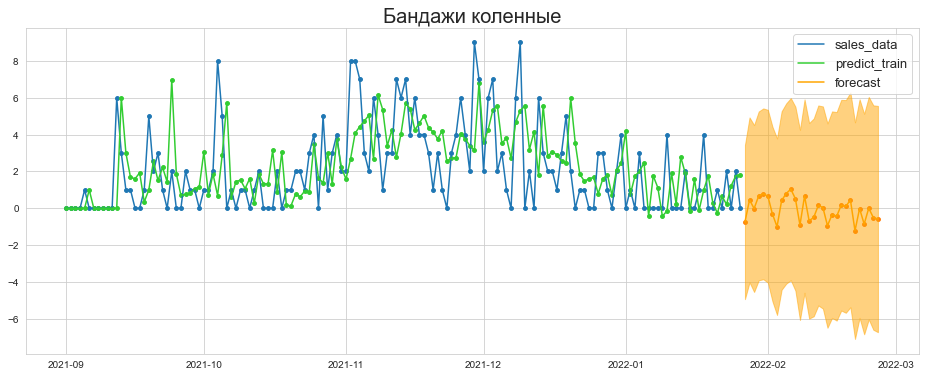

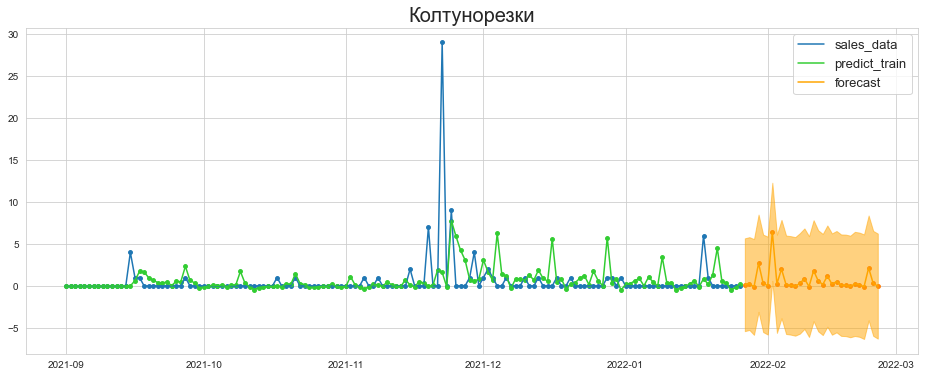

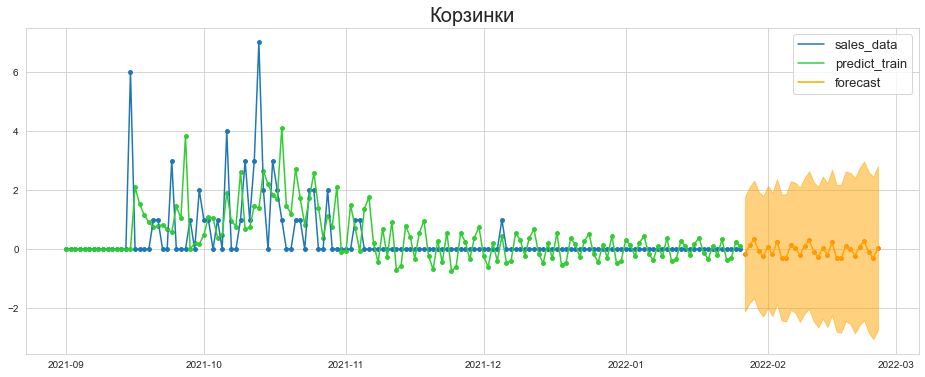

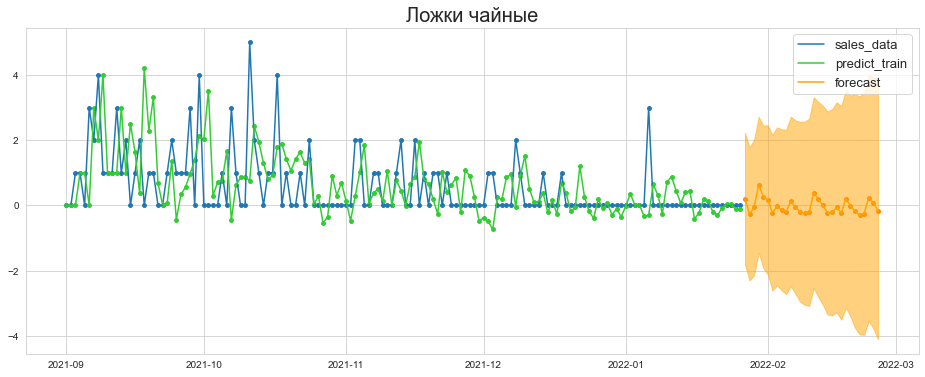

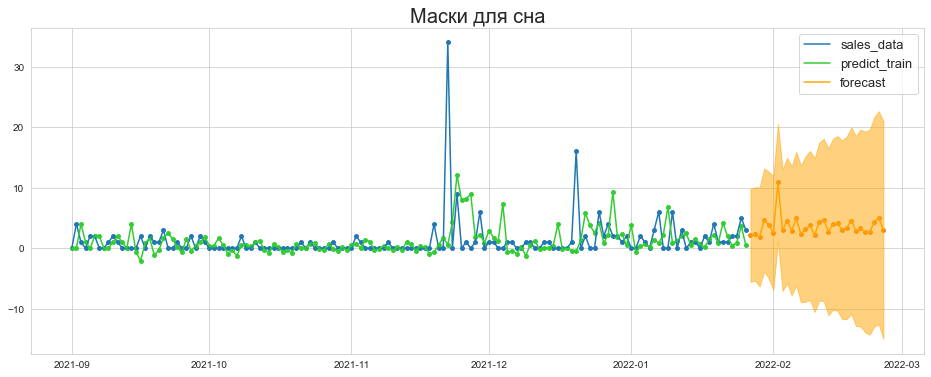

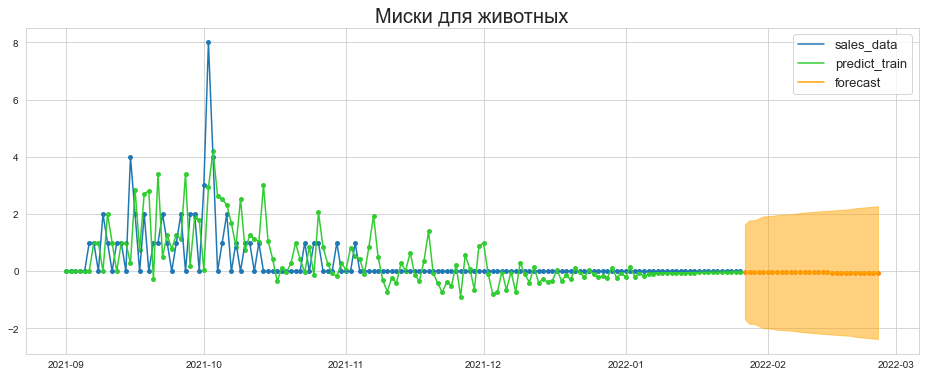

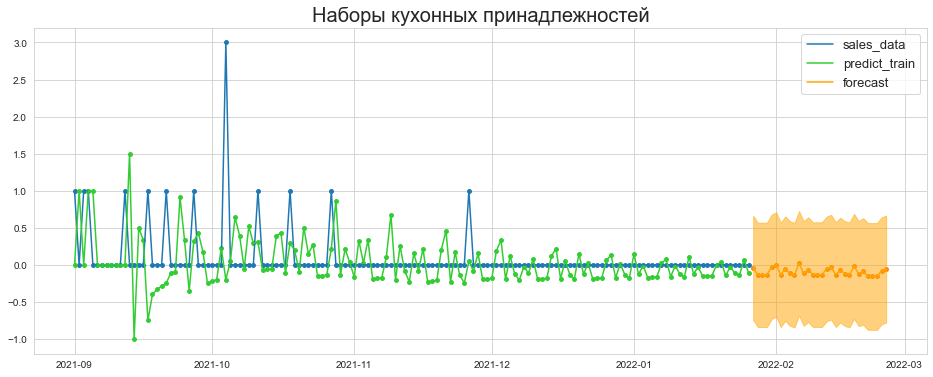

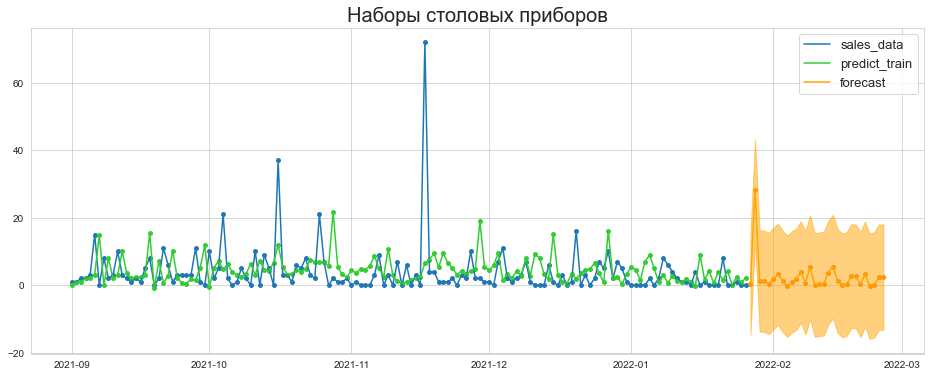

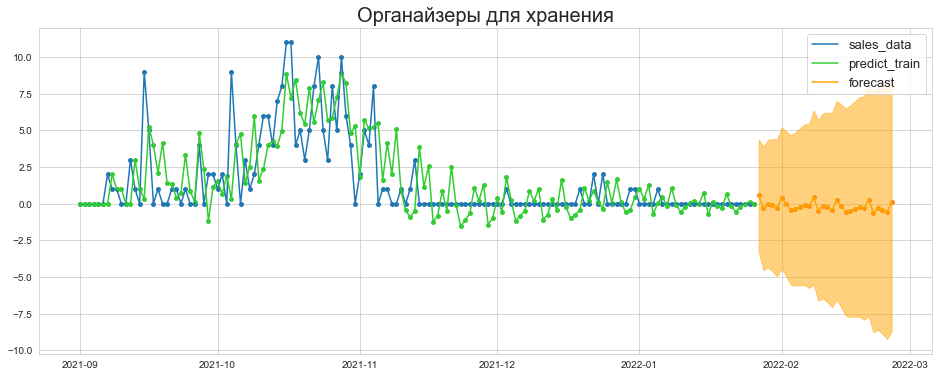

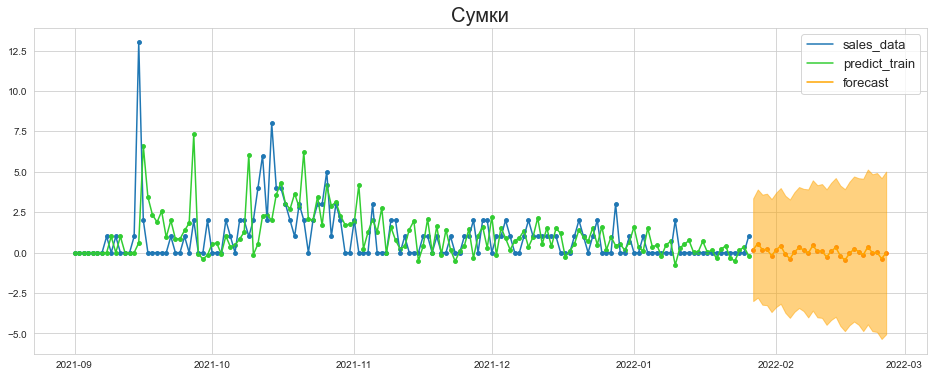

In [10]:
N = 30
predict_train_data = True

if 'models_dict' not in locals():
    models_dict = pickle.load(
        open(p_join(PROJECT_PATH, 'models', find_latest_model(), 'arima_models.pkl'), mode='rb')
    )

for subject in df_for_forecast['subject'].unique():
    if subject in models_dict:
        preds, confint = models_dict[subject].predict(n_periods=N, return_conf_int=True)
    else:
        print(f'{subject} not in models_dict')
        continue
    plt.figure(figsize=(16, 6))
    plt.title(f'{subject}', fontsize=20);
    plt.scatter(df_for_forecast[(df_for_forecast['subject'] == subject)]['day'], 
                df_for_forecast[(df_for_forecast['subject'] == subject)].sum_sales, s=15);
    plt.plot(df_for_forecast[(df_for_forecast['subject'] == subject)]['day'], 
             df_for_forecast[(df_for_forecast['subject'] == subject)].sum_sales, label='sales_data');
    
    if predict_train_data:
        plt.scatter(df_for_forecast[(df_for_forecast['subject'] == subject)]['day'], 
                    models_dict[subject].predict_in_sample(), s=15, color='limegreen');
        plt.plot(df_for_forecast[(df_for_forecast['subject'] == subject)]['day'], 
                 models_dict[subject].predict_in_sample(), color='limegreen', label='predict_train');
    
    forecast_dates = [(df_for_forecast['day'].max() + pd.DateOffset(days=i)).date() for i in range(1, N+1)]
    plt.plot(forecast_dates, preds, color='orange', label='forecast');
    plt.scatter(forecast_dates, preds, s=15);
    plt.fill_between(forecast_dates, confint[:, 1], confint[:, 0], color='orange', alpha=0.5);
    plt.legend(fontsize=13);
